In [29]:
library(dplyr)
library(ggplot2)
library(tidyverse)
library(tidyr)
library(reshape2)
library(corrplot)

In [30]:
USvideo <- read.csv('USvideos.csv')
summary(USvideo)
head(USvideo)

CAvideo <- read.csv('CAvideos.csv')
DEvideo <- read.csv('DEvideos.csv')
FRvideo <- read.csv('FRvideos.csv')
GBvideo <- read.csv('GBvideos.csv')
INvideo <- read.csv('INvideos.csv')
JPvideo <- read.csv('JPvideos.csv')
KRvideo <- read.csv('KRvideos.csv')
MXvideo <- read.csv("MXvideos.csv")
RUvideo <- read.csv("RUvideos.csv")


   video_id         trending_date         title           channel_title     
 Length:40949       Length:40949       Length:40949       Length:40949      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
  category_id    publish_time           tags               views          
 Min.   : 1.00   Length:40949       Length:40949       Min.   :      549  
 1st Qu.:17.00   Class :character   Class :character   1st Qu.:   242329  
 Median :24.00   Mode  :character   Mode  :character   Median :   681861  
 Mean   :19.97                                         Mean   :  2360785  
 3rd Qu.:25.00                                         3rd Qu.:  1823157  
 Max.   :43

video_id    trending_date
1 2kyS6SvSYSE 17.14.11     
2 1ZAPwfrtAFY 17.14.11     
3 5qpjK5DgCt4 17.14.11     
4 puqaWrEC7tY 17.14.11     
5 d380meD0W0M 17.14.11     
6 gHZ1Qz0KiKM 17.14.11     
  title                                                         
1 WE WANT TO TALK ABOUT OUR MARRIAGE                            
2 The Trump Presidency: Last Week Tonight with John Oliver (HBO)
3 Racist Superman | Rudy Mancuso, King Bach & Lele Pons         
4 Nickelback Lyrics: Real or Fake?                              
5 I Dare You: GOING BALD!?                                      
6 2 Weeks with iPhone X                                         
  channel_title         category_id publish_time            
1 CaseyNeistat          22          2017-11-13T17:13:01.000Z
2 LastWeekTonight       24          2017-11-13T07:30:00.000Z
3 Rudy Mancuso          23          2017-11-12T19:05:24.000Z
4 Good Mythical Morning 24          2017-11-13T11:00:04.000Z
5 nigahiga              24          2017-11-12T18:01:41.000Z
6 iJustine              28          2017-11-13T19:07:23.000Z
  tags                                                                                                                                                                                                                                                                                                                                                                                                                                     
1 SHANtell martin                                                                                                                                                                                                                                                                                                                                                                                                                          
2 last week tonight trump presidency|last week tonight donald trump|john oliver trump|donald trump                                                                                                                                                                                                                                                                                                                                         
3 racist superman|rudy|mancuso|king|bach|racist|superman|love|rudy mancuso poo bear black white official music video|iphone x by pineapple|lelepons|hannahstocking|rudymancuso|inanna|anwar|sarkis|shots|shotsstudios|alesso|anitta|brazil|Getting My Driver's License | Lele Pons                                                                                                                                                         
4 rhett and link|gmm|good mythical morning|rhett and link good mythical morning|good mythical morning rhett and link|mythical morning|Season 12|nickelback lyrics|nickelback lyrics real or fake|nickelback|nickelback songs|nickelback song|rhett link nickelback|gmm nickelback|lyrics (website category)|nickelback (musical group)|rock|music|lyrics|chad kroeger|canada|music (industry)|mythical|gmm challenge|comedy|funny|challenge
5 ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|dares|no truth|comments|comedy|funny|stupid|fail                                                                                                                                                                                                                                                                                                                                           
6 ijustine|week with iPhone X|iphone x|apple|iphone|iphone x review|iphone x unboxing                                                                                                                                                                                                                                                                               

In [31]:
allVideo <- rbind(CAvideo, DEvideo, FRvideo, GBvideo, INvideo, JPvideo, KRvideo, MXvideo, RUvideo, USvideo)
summary(allVideo)

   video_id         trending_date         title           channel_title     
 Length:375942      Length:375942      Length:375942      Length:375942     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
  category_id    publish_time           tags               views          
 Min.   : 1.00   Length:375942      Length:375942      Min.   :      117  
 1st Qu.:17.00   Class :character   Class :character   1st Qu.:    46978  
 Median :23.00   Mode  :character   Mode  :character   Median :   177370  
 Mean   :20.23                                         Mean   :  1326568  
 3rd Qu.:24.00                                         3rd Qu.:   647679  
 Max.   :44

In [32]:
allVideoSorted <- allVideo %>% arrange(desc(views))
head(allVideoSorted)


video_id    trending_date
1 _I_D_8Z4sJE 18.07.04     
2 _I_D_8Z4sJE 18.06.04     
3 _I_D_8Z4sJE 18.05.04     
4 _I_D_8Z4sJE 18.04.04     
5 _I_D_8Z4sJE 18.03.04     
6 _I_D_8Z4sJE 18.02.04     
  title                                                                     
1 Nicky Jam x J. Balvin - X (EQUIS) | Video Oficial | Prod. Afro Bros & Jeon
2 Nicky Jam x J. Balvin - X (EQUIS) | Video Oficial | Prod. Afro Bros & Jeon
3 Nicky Jam x J. Balvin - X (EQUIS) | Video Oficial | Prod. Afro Bros & Jeon
4 Nicky Jam x J. Balvin - X (EQUIS) | Video Oficial | Prod. Afro Bros & Jeon
5 Nicky Jam x J. Balvin - X (EQUIS) | Video Oficial | Prod. Afro Bros & Jeon
6 Nicky Jam x J. Balvin - X (EQUIS) | Video Oficial | Prod. Afro Bros & Jeon
  channel_title category_id publish_time            
1 NickyJamTV    10          2018-03-02T05:00:19.000Z
2 NickyJamTV    10          2018-03-02T05:00:19.000Z
3 NickyJamTV    10          2018-03-02T05:00:19.000Z
4 NickyJamTV    10          2018-03-02T05:00:19.000Z
5 NickyJamTV    10          2018-03-02T05:00:19.000Z
6 NickyJamTV    10          2018-03-02T05:00:19.000Z
  tags                                                                                                                                                                                                                                                                                                                                                                            
1 Bad Bunny|Amorfoda|Dura|Daddy Yankee|Ozuna|Romeo Santos|El Farsante Remix|Drake|God’s Plan|Luis Fonsi|Demi Lovato|Échame La Culpa|Sobredosis|Maluma|Corazón|Nego do Borel|Ed Sheeran|Perfect|Shape of You|Camila Cabello|Havana|Young Thug|Wisin|Yandel|Todo Comienza en la Disco|Piso 21|Déjala Que Vuelva|Manuel Turizo|Despacito|Síguelo Bailando|Reik|Me Niego|Bella Wolfine
2 Bad Bunny|Amorfoda|Dura|Daddy Yankee|Ozuna|Romeo Santos|El Farsante Remix|Drake|God’s Plan|Luis Fonsi|Demi Lovato|Échame La Culpa|Sobredosis|Maluma|Corazón|Nego do Borel|Ed Sheeran|Perfect|Shape of You|Camila Cabello|Havana|Young Thug|Wisin|Yandel|Todo Comienza en la Disco|Piso 21|Déjala Que Vuelva|Manuel Turizo|Despacito|Síguelo Bailando|Reik|Me Niego|Bella Wolfine
3 Bad Bunny|Amorfoda|Dura|Daddy Yankee|Ozuna|Romeo Santos|El Farsante Remix|Drake|God’s Plan|Luis Fonsi|Demi Lovato|Échame La Culpa|Sobredosis|Maluma|Corazón|Nego do Borel|Ed Sheeran|Perfect|Shape of You|Camila Cabello|Havana|Young Thug|Wisin|Yandel|Todo Comienza en la Disco|Piso 21|Déjala Que Vuelva|Manuel Turizo|Despacito|Síguelo Bailando|Reik|Me Niego|Bella Wolfine
4 Bad Bunny|Amorfoda|Dura|Daddy Yankee|Ozuna|Romeo Santos|El Farsante Remix|Drake|God’s Plan|Luis Fonsi|Demi Lovato|Échame La Culpa|Sobredosis|Maluma|Corazón|Nego do Borel|Ed Sheeran|Perfect|Shape of You|Camila Cabello|Havana|Young Thug|Wisin|Yandel|Todo Comienza en la Disco|Piso 21|Déjala Que Vuelva|Manuel Turizo|Despacito|Síguelo Bailando|Reik|Me Niego|Bella Wolfine
5 Bad Bunny|Amorfoda|Dura|Daddy Yankee|Ozuna|Romeo Santos|El Farsante Remix|Drake|God’s Plan|Luis Fonsi|Demi Lovato|Échame La Culpa|Sobredosis|Maluma|Corazón|Nego do Borel|Ed Sheeran|Perfect|Shape of You|Camila Cabello|Havana|Young Thug|Wisin|Yandel|Todo Comienza en la Disco|Piso 21|Déjala Que Vuelva|Manuel Turizo|Despacito|Síguelo Bailando|Reik|Me Niego|Bella Wolfine
6 Bad Bunny|Amorfoda|Dura|Daddy Yankee|Ozuna|Romeo Santos|El Farsante Remix|Drake|God’s Plan|Luis Fonsi|Demi Lovato|Échame La Culpa|Sobredosis|Maluma|Corazón|Nego do Borel|Ed Sheeran|Perfect|Shape of You|Camila Cabello|Havana|Young Thug|Wisin|Yandel|Todo Comienza en la Disco|Piso 21|Déjala Que Vuelva|Manuel Turizo|Despacito|Síguelo Bailando|Reik|Me Niego|Bella Wolfine
  views     likes   dislikes comment_count
1 424538912 2818771 149275   99380        
2 413586699 2768654 145643   97218        
3 402650804 2719005 142006   95713        
4 392036878 2670723 138334   93834        
5 382401497 2618320 134625   92387        
6 372399338 2564815 131168   90644       

In [33]:
top10Video <- allVideoSorted[match(unique(allVideoSorted$video_id), allVideoSorted$video_id), ]
top10Video2 <- top10Video[1:10, ]
top10Video2

top100Video <- top10Video[1:100, ]
top1000Video <- top10Video[1:1000, ]

video_id    trending_date
1   _I_D_8Z4sJE 18.07.04     
10  9jI-z9QN6g8 18.18.05     
11  kLpH1nSLJSs 18.23.03     
25  wfWkmURBNv8 18.01.03     
39  VYOjWnS4cMY 18.11.06     
41  xpVfcZ0ZcFM 18.25.03     
83  ffxKSjUwKdU 18.26.05     
90  zEf423kYfqk 18.26.05     
130 FlsCjmMhFmw 17.24.12     
135 sGIm0-dQd8M 18.14.02     
    title                                                                                  
1   Nicky Jam x J. Balvin - X (EQUIS) | Video Oficial | Prod. Afro Bros & Jeon             
10  Te Bote Remix - Casper, Nio García, Darell, Nicky Jam, Bad Bunny, Ozuna | Video Oficial
11  Bad Bunny - Amorfoda | Video Oficial                                                   
25  Ozuna x Romeo Santos - El Farsante Remix                                               
39  Childish Gambino - This Is America (Official Video)                                    
41  Drake - God’s Plan                                                                     
83  Ariana Grande - No Tears Left To Cry                                                   
90  Becky G, Natti Natasha - Sin Pijama (Official Video)                                   
130 YouTube Rewind: The Shape of 2017 | #YouTubeRewind                                     
135 Dura - Daddy Yankee (Video Oficial)                                                    
    channel_title       category_id publish_time            
1   NickyJamTV          10          2018-03-02T05:00:19.000Z
10  Flow La Movie       10          2018-04-11T22:00:00.000Z
11  Bad Bunny           10          2018-02-15T00:00:03.000Z
25  Ozuna               10          2018-01-30T15:00:05.000Z
39  ChildishGambinoVEVO 10          2018-05-06T04:00:07.000Z
41  DrakeVEVO           10          2018-02-17T05:00:01.000Z
83  ArianaGrandeVevo    10          2018-04-20T04:00:03.000Z
90  BeckyGVEVO          10          2018-04-20T10:40:51.000Z
130 YouTube Spotlight   24          2017-12-06T17:58:51.000Z
135 Daddy Yankee        10          2018-01-18T22:32:49.000Z
    tags                                                                                                                                                                                                                                                                                                                                                                                                                                                 
1   Bad Bunny|Amorfoda|Dura|Daddy Yankee|Ozuna|Romeo Santos|El Farsante Remix|Drake|God’s Plan|Luis Fonsi|Demi Lovato|Échame La Culpa|Sobredosis|Maluma|Corazón|Nego do Borel|Ed Sheeran|Perfect|Shape of You|Camila Cabello|Havana|Young Thug|Wisin|Yandel|Todo Comienza en la Disco|Piso 21|Déjala Que Vuelva|Manuel Turizo|Despacito|Síguelo Bailando|Reik|Me Niego|Bella Wolfine                                                                     
10  Te Bote|Te Bote Remix|Flow La Movie|Ozuna|Nio Garcia|Casper|Nicky Jam|Bad Bunny|Darell                                                                                                                                                                                                                                                                                                                                                               
11  Bad|Bunny|Bad Bunny|Video Oficial|Music Video|Amor Foda|Amorfoda|No Quiero Que Nadie Me Hable De Amor|Ya Me Canse|Que nadie me hable de amor|San Valentin                                                                                                                                                                                                                                                                                            
25  Ozuna|Reggaeton|Odisea|Odisea The Album|Romeo Santos|El Farsante Remix                                                                                                                                                     

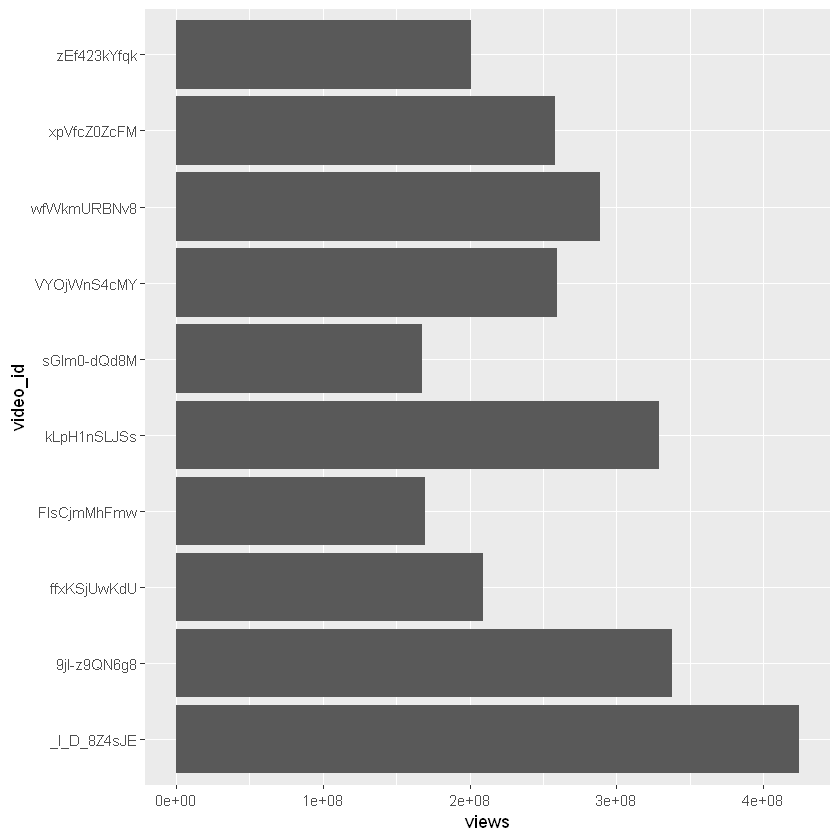

In [34]:
barGraph2 <- ggplot(top10Video2, aes(x=video_id, y=views)) + geom_bar(position="dodge", stat="identity") + coord_flip()
barGraph2

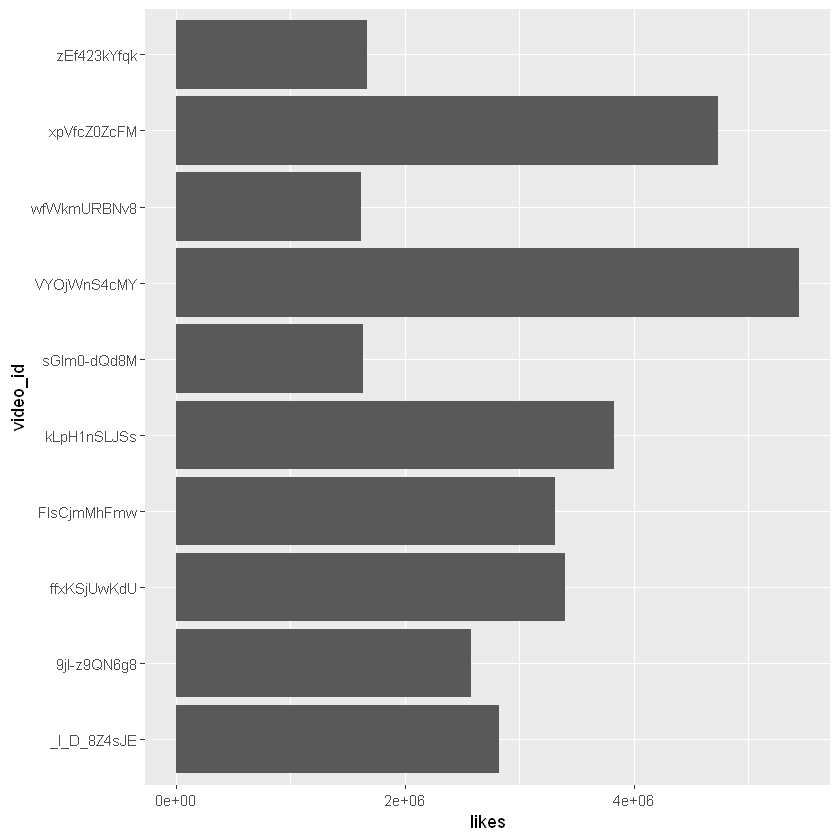

In [35]:
barGraph5 <- ggplot(top10Video2, aes(x=video_id, y=likes)) + geom_bar(position="dodge", stat="identity") + coord_flip() 
barGraph5

In [36]:
top10Video3 <- top10Video2[, c("video_id", "likes", "dislikes")]
top10Long <- melt(top10Video3, id.var = "video_id")
top10Long

video_id    variable value  
1  _I_D_8Z4sJE likes    2818771
2  9jI-z9QN6g8 likes    2581961
3  kLpH1nSLJSs likes    3823879
4  wfWkmURBNv8 likes    1618180
5  VYOjWnS4cMY likes    5444541
6  xpVfcZ0ZcFM likes    4737873
7  ffxKSjUwKdU likes    3394437
8  zEf423kYfqk likes    1668418
9  FlsCjmMhFmw likes    3312868
10 sGIm0-dQd8M likes    1633407
11 _I_D_8Z4sJE dislikes  149275
12 9jI-z9QN6g8 dislikes  166549
13 kLpH1nSLJSs dislikes  215530
14 wfWkmURBNv8 dislikes  151147
15 VYOjWnS4cMY dislikes  379862
16 xpVfcZ0ZcFM dislikes  117198
17 ffxKSjUwKdU dislikes  150086
18 zEf423kYfqk dislikes  142569
19 FlsCjmMhFmw dislikes 1753274
20 sGIm0-dQd8M dislikes   74005

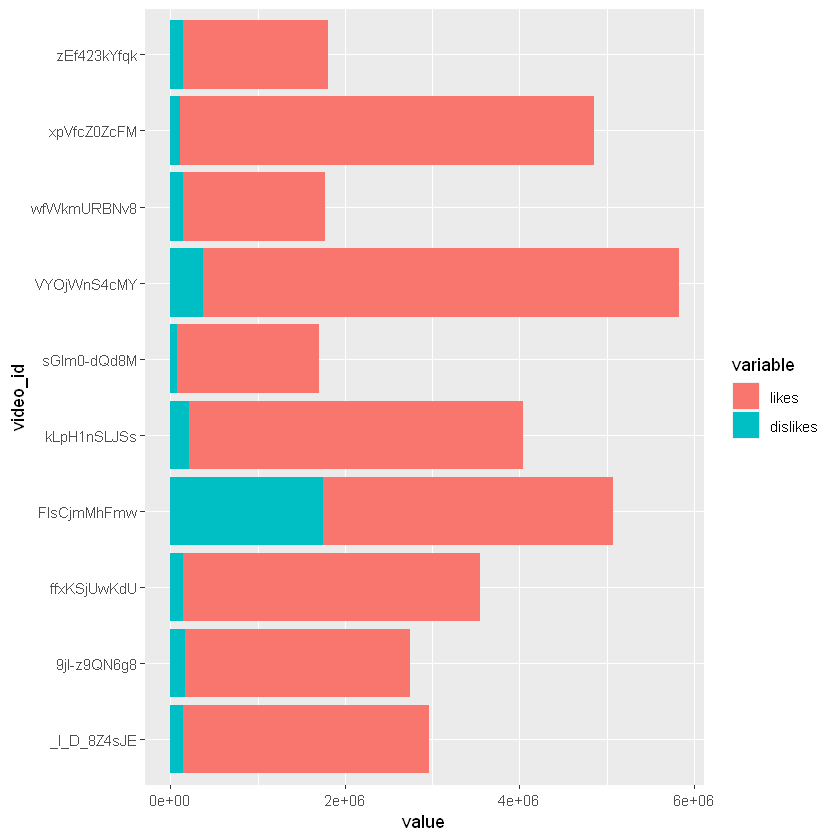

In [37]:
stackedBar <- ggplot(top10Long, aes(x=video_id, y=value, fill=variable)) + geom_bar(stat="identity") + coord_flip()
stackedBar

In [38]:
t2 <- table(top10Video2$category_id)
t2


10 24 
 9  1 

In [39]:
t3 <- table(top100Video$category_id)
t3

categoryID3 <- as.data.frame(t3)
categoryID3$Category <- c("Film & Animation", "Music", "People & Blogs", "Comedy", "Entertainment", "Howto & Style", "Science & Technology")
categoryID3


 1 10 22 23 24 26 28 
 3 83  1  1 10  1  1 

Var1 Freq Category            
1 1     3   Film & Animation    
2 10   83   Music               
3 22    1   People & Blogs      
4 23    1   Comedy              
5 24   10   Entertainment       
6 26    1   Howto & Style       
7 28    1   Science & Technology

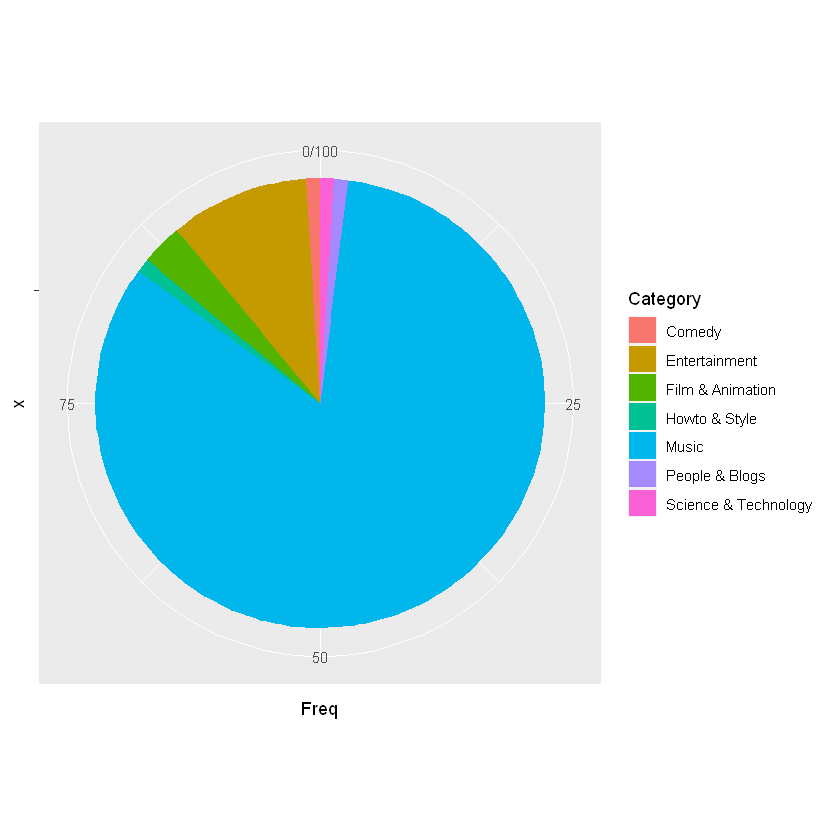

In [40]:
pieChart3 <- ggplot(categoryID3, aes(x="", y=Freq, fill=Category)) + geom_bar(stat="identity", width=1) + coord_polar("y", start=0)
pieChart3

In [41]:
t4 <- table(top1000Video$category_id)
t4

categoryID4 <- as.data.frame(t4)
categoryID4$Category <- c("Film & Animation", "Autos & Vehicles", "Music", "Pets & Animals", "Sports", "Travel & Events", "Gaming", "People & Blogs", "Comedy", "Entertainment",  "News & Politics", "Howto & Style", "Education", "Science & Technology", "Nonprofits & Activism", "Movies")
categoryID4


  1   2  10  15  17  19  20  22  23  24  25  26  27  28  29  30 
 66   5 501   4  42   2  13  43  35 232  17  16   5  17   1   1 

Var1 Freq Category             
1  1     66  Film & Animation     
2  2      5  Autos & Vehicles     
3  10   501  Music                
4  15     4  Pets & Animals       
5  17    42  Sports               
6  19     2  Travel & Events      
7  20    13  Gaming               
8  22    43  People & Blogs       
9  23    35  Comedy               
10 24   232  Entertainment        
11 25    17  News & Politics      
12 26    16  Howto & Style        
13 27     5  Education            
14 28    17  Science & Technology 
15 29     1  Nonprofits & Activism
16 30     1  Movies

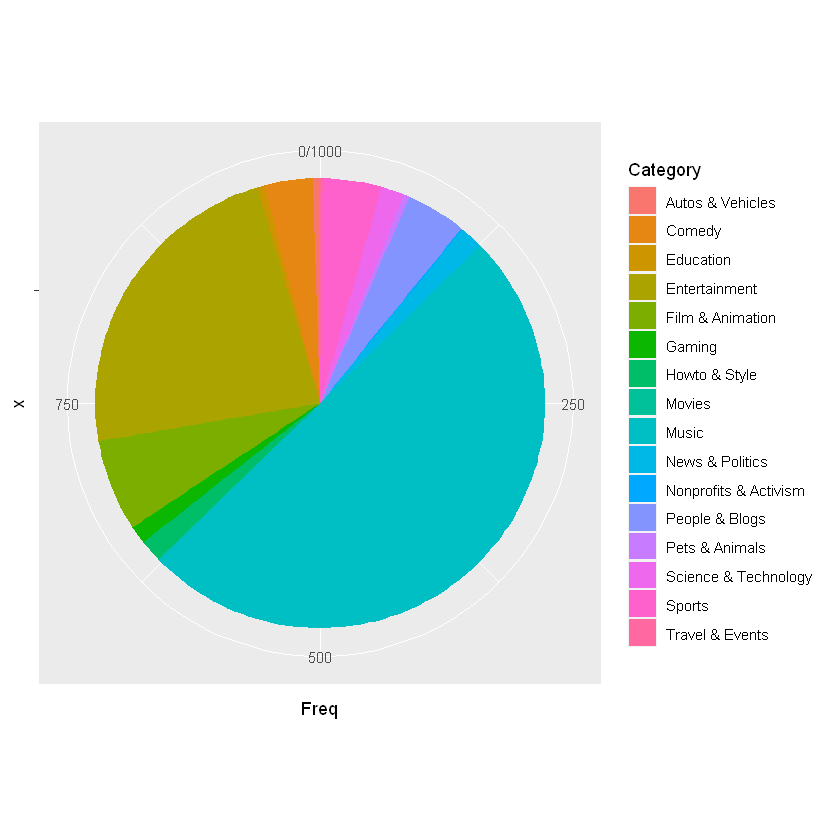

In [42]:
pieChart4 <- ggplot(categoryID4, aes(x="", y=Freq, fill=Category)) + geom_bar(stat="identity", width=1) + coord_polar("y", start=0)
pieChart4

In [43]:
categoryID2 <- as.data.frame(t2)
categoryID2$Category <- c("Music", "Entertainment")
categoryID2

Var1 Freq Category     
1 10   9    Music        
2 24   1    Entertainment

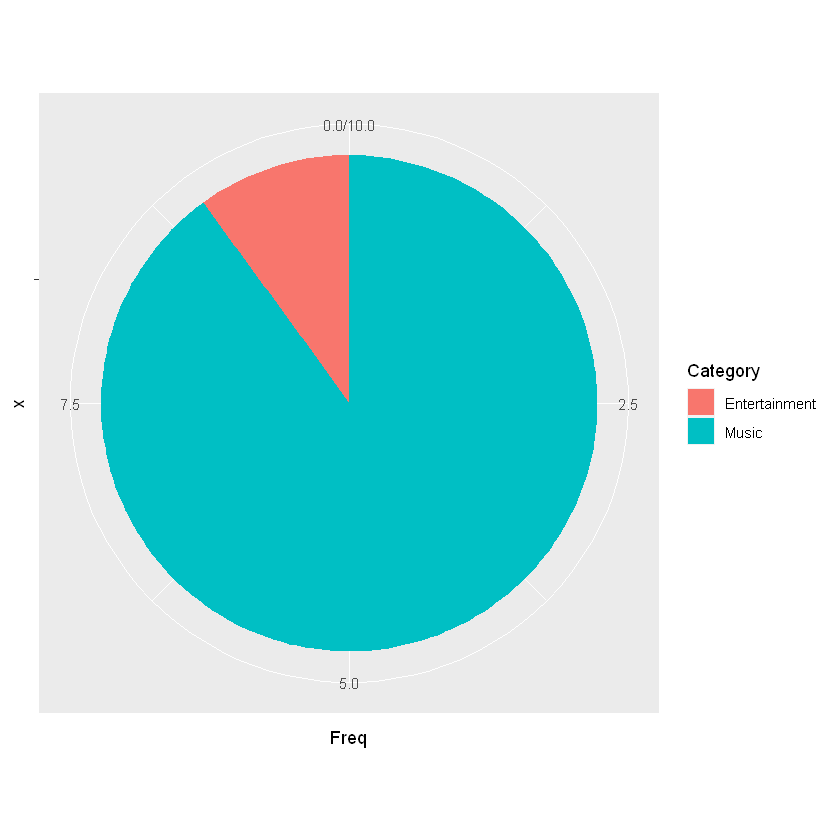

In [44]:
pieChart2 <- ggplot(categoryID2, aes(x="", y=Freq, fill=Category)) + geom_bar(stat="identity", width=1) + coord_polar("y", start=0)
pieChart2

In [45]:
t1 <- table(allVideoSorted$category_id)
t1


     1      2     10     15     17     19     20     22     23     24     25 
 20932   4734  42514   4863  23684   1776  11498  54052  26970 109006  37288 
    26     27     28     29     30     43     44 
 18856   7788   8171   2795     36    974      5 

In [46]:
categoryID <- as.data.frame(t1)
categoryID$Category <- c("Film & Animation", "Autos & Vehicles", "Music", "Pets & Animals", "Sports", "Travel & Events", "Gaming", "People & Blogs", "Comedy", "Entertainment", "News & Politics", "Howto & Style", "Education", "Science & Technology", "Nonprofits & Activism", "Movies", "Shows", "Trailers")
categoryID

Var1 Freq   Category             
1  1     20932 Film & Animation     
2  2      4734 Autos & Vehicles     
3  10    42514 Music                
4  15     4863 Pets & Animals       
5  17    23684 Sports               
6  19     1776 Travel & Events      
7  20    11498 Gaming               
8  22    54052 People & Blogs       
9  23    26970 Comedy               
10 24   109006 Entertainment        
11 25    37288 News & Politics      
12 26    18856 Howto & Style        
13 27     7788 Education            
14 28     8171 Science & Technology 
15 29     2795 Nonprofits & Activism
16 30       36 Movies               
17 43      974 Shows                
18 44        5 Trailers

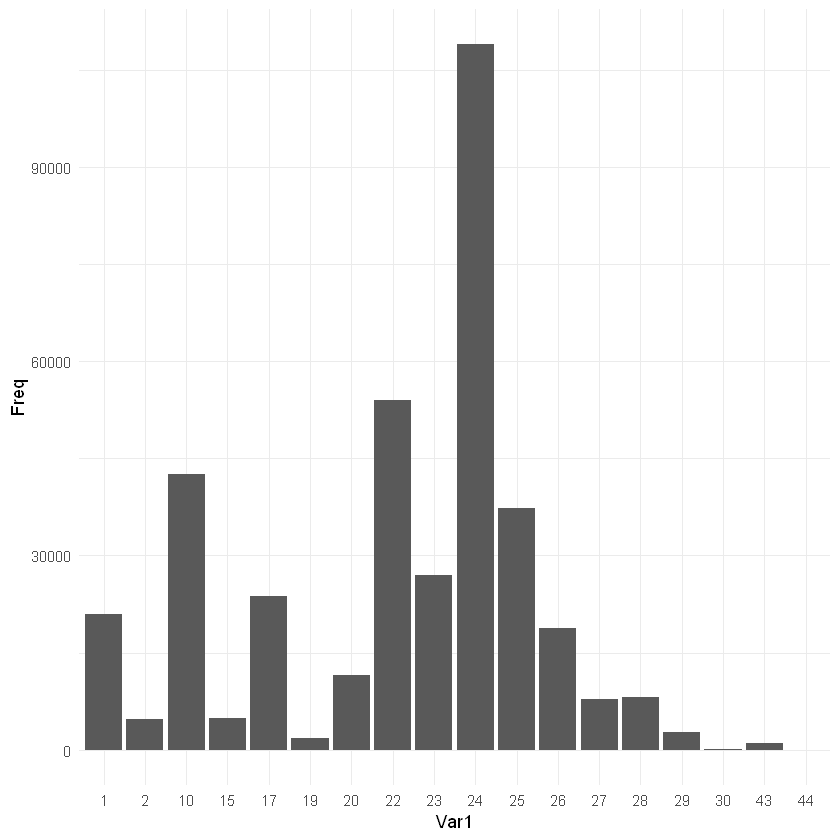

In [47]:
barGraph1 <- ggplot(categoryID, aes(x=Var1, y=Freq)) + geom_bar(stat="identity") + theme_minimal()
barGraph1

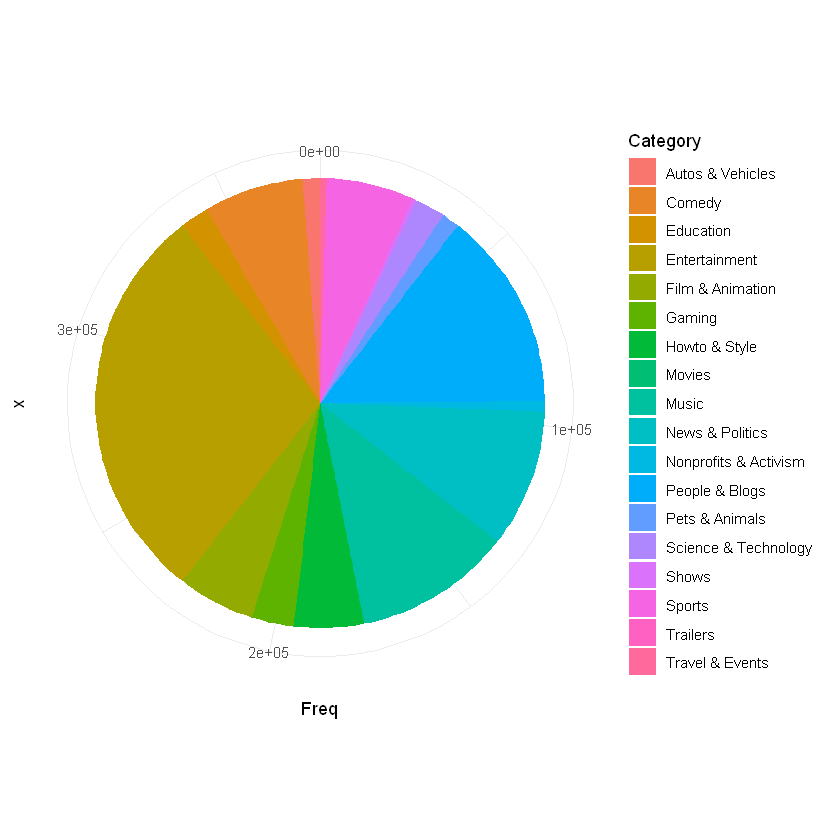

In [48]:
pieChart1 <- ggplot(categoryID, aes(x="", y=Freq, fill=Category)) + geom_bar(stat="identity", width=1) + coord_polar("y", start=0) + theme_minimal()
pieChart1

In [49]:
allVideo$category_id <- as.character(allVideo$category_id)

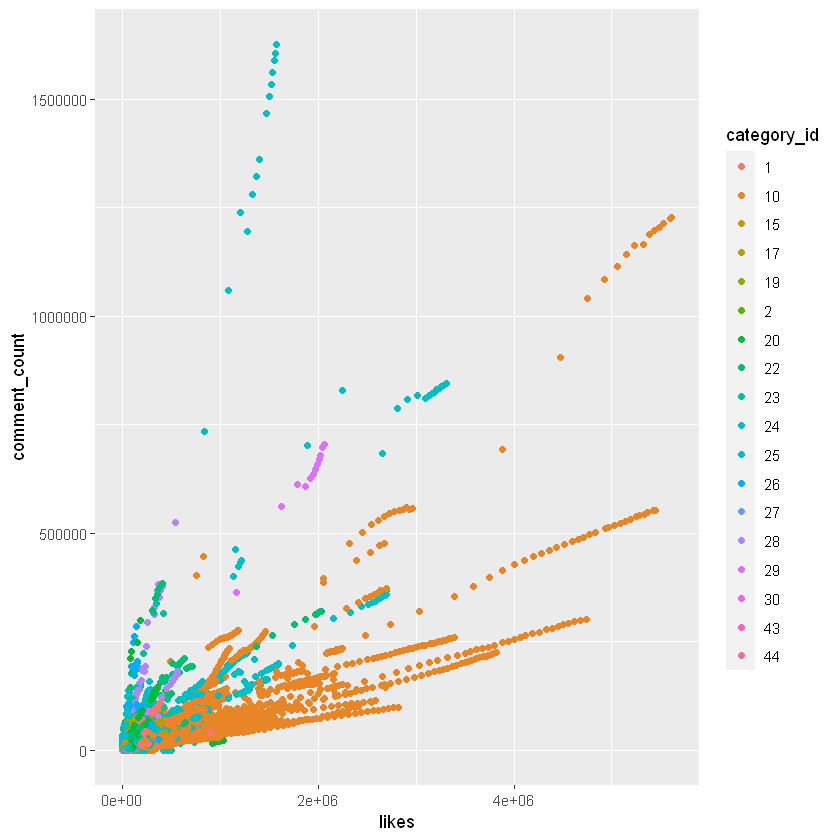

In [50]:
scatterGraph2 <- ggplot(allVideo, aes(x=likes, y=comment_count, col=category_id)) + geom_point()
scatterGraph2

In [51]:
top5000 <- allVideoSorted[1:5000, ]
top5000$category_id <- as.character(top5000$category_id)

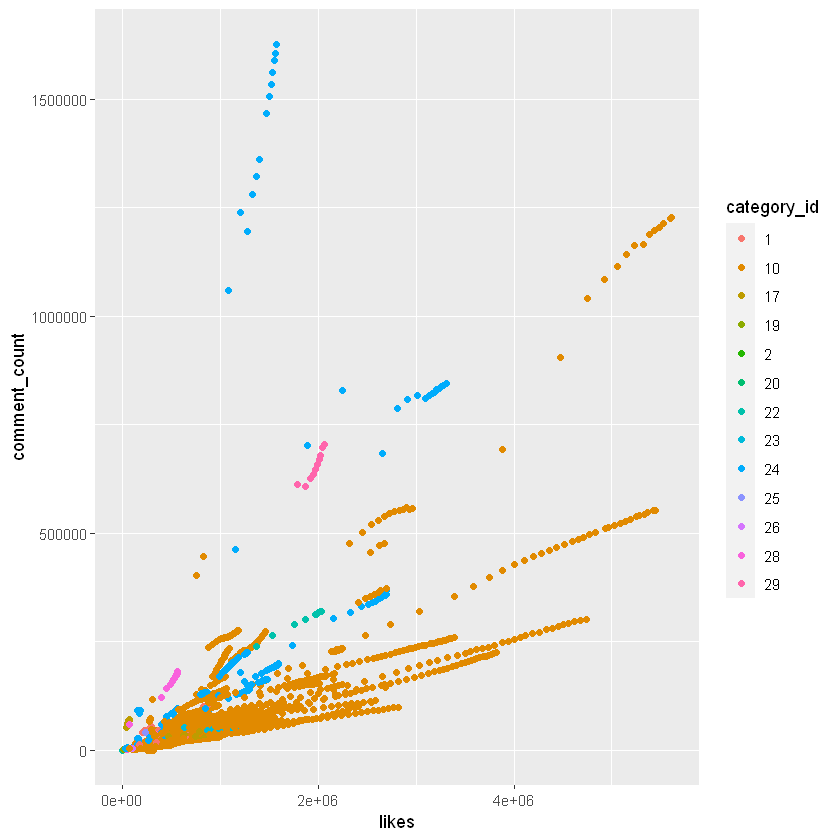

In [52]:
scatterGraphTop2 <- ggplot(top5000, aes(x=likes, y=comment_count, col=category_id)) + geom_point()
scatterGraphTop2 

In [53]:
top1000 <- allVideoSorted[1:1000, ]
top1000$category_id <- as.character(top1000$category_id)


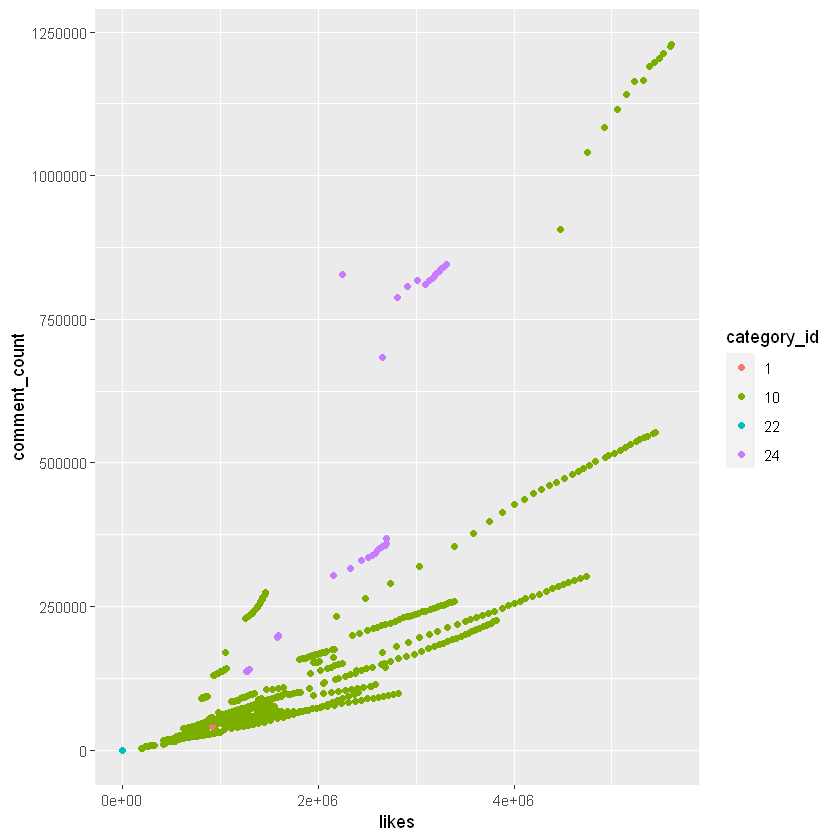

In [54]:
scatterGraphTop3 <- ggplot(top1000, aes(x=likes, y=comment_count, col=category_id)) + geom_point()
scatterGraphTop3 

In [55]:
viewerInteraction <- allVideo[, c('views', 'likes', 'dislikes', 'comment_count')]
viewerInteractionCor <- cor(viewerInteraction)
viewerInteractionCor

views     likes     dislikes  comment_count
views         1.0000000 0.7777960 0.4216530 0.5100302    
likes         0.7777960 1.0000000 0.4537097 0.7944897    
dislikes      0.4216530 0.4537097 1.0000000 0.7051815    
comment_count 0.5100302 0.7944897 0.7051815 1.0000000

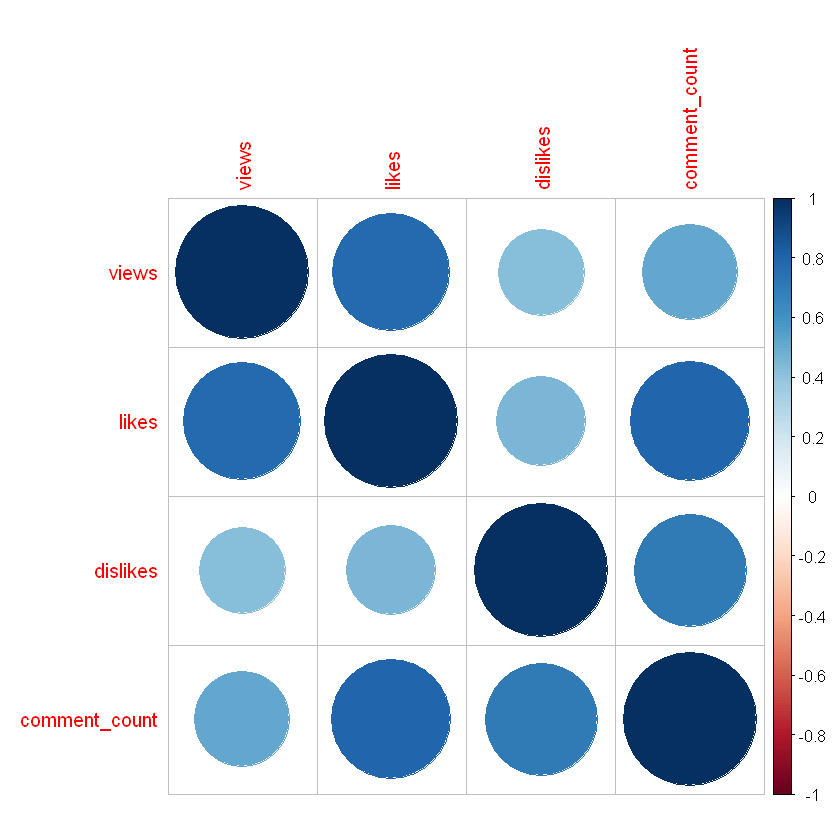

In [56]:
corrplot(viewerInteractionCor)